## Simulation und Modellierung WS 16/17 Uebung 07 : 
### Abgabe zum 11.12.2016

### <u>Aufgabe 1</u> Erste Schritte mit Git (3P)

Ziel dieser Aufgabe ist, die Lösung dieses kompletten Aufgabenblattes bei einem Git-Filehost (github) online zu stellen. An der hochgeladenen Version sollen Sie dann noch mindestens eine Änderung vornehmen.

Nun der Reihenfolge nach: 
* Erstellen Sie einen Account bei Github mit einem `username`

  https://github.com/
 
  Erstellen Sie dort per Mausklick ein neues Repository, z.B. `my_repo`. (unter `new repository`)

* Installieren Sie git auf Ihrem Arbeitsrechner:

  #### Linux:
  
  `yum install git`
  
  `apt-get install git`
  
  `zypper in git`

  #### Mac:
  
  `brew install git`
  
  https://git-scm.com/download/mac
  
  #### Windows:
  
  http://git-for-windows.github.io//

  Setzen Sie dann eventuell Namen und Adresse.
  
  `git config --global user.name "Your Name"`
  
  `git config --global user.email you@example.com`


* Initialisieren Sie git in einem neuen Ordner. Fügen Sie `my_repo.git` als origin hinzu. Speichern Sie dieses notebook im neuen Ordner. Führen Sie `git add .`, `git commit -m "  "` und `git push origin master` aus. Das alles geht im Terminal folgendermaßen:

  ```bash
      mkdir neuer_ordner
      cd neuer_ordner
      git init
      git remote add origin https://username@bitbucket.org/username/my_repo.git
      cp /path/to/notebook/my_notebook.ipynb my_notebook.ipynb
      git add .
      git commit -m "Dieses notebook ist die Hausaufgabe Blatt 7, zunaechst unausgefuellt."
      git push origin master  
  ```
  
  Sehen Sie nach, ob Ihr notebook online ist.

* Spielen Sie mit `git status`, `git log`, `git branch -av` .. herum und klicken Sie im Webfilehost herum, bis Sie sich ein wenig auskennen. Schreiben Sie Fragen für die Übung auf.

* Nehmen Sie nun lokal auf Ihrem Rechner Änderungen am notebook vor, zum Beispiel indem Sie die Hausaufgaben lösen. Ändern Sie dies wie oben online: `git add .`, `git commit -m "  "`, `git push origin master`. Achten Sie auf sinnvolle commit-Kommentare.
  
  ```bash
      git add .
      git commit -m "Aufg. 1 geloest, es gibt noch ein Problem mit dem Vorzeichen von h."
      git push origin master  
  ```

Senden Sie den https-Repository-Pfad an frpeter (at) uni-potsdam.de.

### <u>Aufgabe 2</u> Das Lineare Least Squares Problem (7P)

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung mit den von Ihnen gefundenen Koeffizienten erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen die Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder den Wertebereich von $x$ explizit berechnen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

0.956731246417
[ 0.9827333   0.95673125  0.95861779  1.00987493  1.02591762]
A=  0.98273329851
B=  0.956731246417
C=  0.958617791606
D=  1.00987492995
E=  1.02591761782
geschlossen
[ True  True  True ...,  True  True  True]


/Users/jannwinkler/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in sqrt
/Users/jannwinkler/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in sqrt


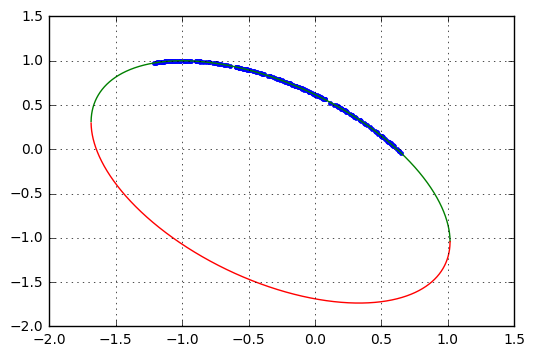

In [3]:
import numpy as np
from pylab import *
%matplotlib inline

data=np.loadtxt ("orbit.dat")
#np.genfromtxt(...)

x= data[:,0]
y=data[:,1]
#print(x)
#print(y)



b= np.ones(200)
#print(b)


MatA= np.zeros((200,5))
MatA[:,0]= x**2
MatA[:,1]= x*y
MatA[:,2]= y**2
MatA[:,3]= x
MatA[:,4]= y
shape(MatA)

vec_c = np.linalg.solve(MatA.T.dot(MatA),MatA.T.dot(b))
#G=np.sum(A.T,axis=0) # für A.T.dot(b)
#print(G)
print(vec_c.min(axis = None))

print(vec_c)
A= vec_c[0]
B= vec_c[1]
C= vec_c[2]
D= vec_c[3]
E= vec_c[4]
print("A= ",A),print("B= ",B),print("C= ",C), print("D= ",D),print("E= ",E)


test= (B**2 - 4*A*C)

if test < 0:
    print("geschlossen")
elif test == 0:
    print("parabel")
else:
    print("hyperbel")


h=linspace(-1.7,1.05,50000)    # Ich habe den Bereich etwas eingegrenzt, nach Nährung durch die Funktion w. Leider nicht so gut

p=(E+B*h)/C
q=(A*h**2+D*h-1)/C
f1= -p/2 + sqrt((p/2)**2 - q)
f2= -p/2 - sqrt((p/2)**2 - q)
w=(p/2)**2 - q

plot(x,y,'.')
plot(h,f1)
plot(h,f2)
plt.grid()
show()

#plot(h,w)
#show

### <u>Zusatzaufgabe</u> (2P)

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Containern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert. *Hinweis* : wandeln Sie `x` und `y` in `numpy` arrays um.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen.
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.

In [13]:
def polyfit(x,y,N=0):
    """Dies ist eine Funktion, welche die Koeffizientenmatrix c_mat eines Polynomes
    n.ten Grades und die Summe der quadratischen Abweichungen minimiert. 
    Dabei kann man den Grad des Polynoms mit N ändern """
    
    x_vec= np.array(x)
    y_vec= np.array(y)
    
    a= len(y)
    
    h_mat = np.zeros((a, N+1))
    for l in range (N+1):
        h_mat[:,l] = x_vec**l
        
    c_mat = np.linalg.solve(h_mat.T.dot(h_mat), h_mat.T.dot(y_vec))
    
    return(c_mat)


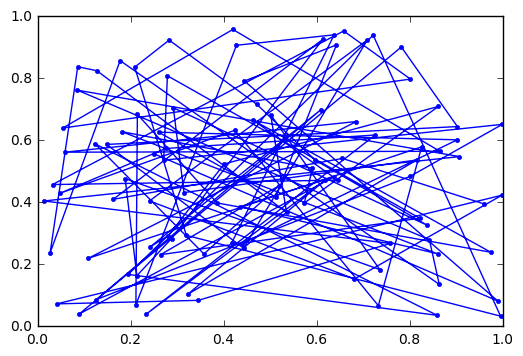

In [21]:
x=np.random.random(100)
y=np.random.random(100)
plot(x,y,'.-')
show()

In [14]:
o = np.genfromtxt("orbit.dat")
x_vec= o[:,0]
y_vec= o[:,1]

d= polyfit(x_vec, y_vec, N=4)
print(d)

TypeError: polyfit() got an unexpected keyword argument 'N'